<p align="center">
  <strong>Machine Vision Lab Assignment 1A</strong><br>
  <strong> BCSE417P </strong><br>
  Joel Antony James, 21BAI1369
</p>
\

# TASK-1: Basic image statistics, colorspace conversion

Objective:

Compute basic statistics and convert an image into different color spaces.

Steps:

. Read the Image: Load an image using OpenCV.

. Compute Basic Statistics: Calculate the mean, standard deviation, and histogram of each color channel.

. Convert Color Spaces: Convert the image to HSV and Lab color spaces and display the results

In [ ]:
#importing libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

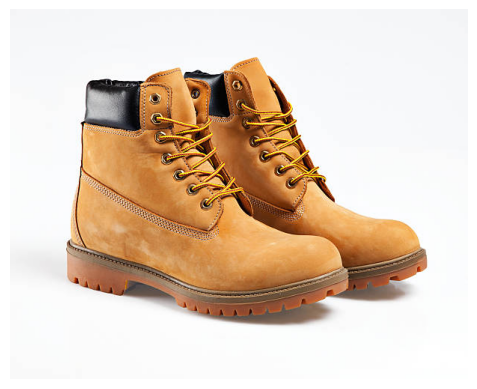

In [ ]:
#plotting the image using plt, cv.imshow() doesn't work well

img=cv.imread("/content/boots.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB) #plotting the image in RGB (matplotlib default) instead of BGR (openCV default)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#splitting image into color channels

b, g, r = cv.split(img)
print(f"{b}\n\n\n{g}\n\n\n{r}")

[[244 244 244 ... 243 243 243]
 [244 244 244 ... 243 243 243]
 [244 244 244 ... 243 243 243]
 ...
 [249 249 249 ... 253 253 253]
 [249 249 249 ... 253 253 253]
 [249 249 249 ... 253 253 253]]


[[244 244 244 ... 244 244 244]
 [244 244 244 ... 244 244 244]
 [244 244 244 ... 244 244 244]
 ...
 [249 249 249 ... 255 255 255]
 [249 249 249 ... 255 255 255]
 [249 249 249 ... 255 255 255]]


[[246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 ...
 [249 249 249 ... 254 254 254]
 [249 249 249 ... 254 254 254]
 [249 249 249 ... 254 254 254]]


In [ ]:
#creating 3 images from each individual channel

zeros = np.zeros(b.shape, np.uint8) #creating zero matrix, used for reconstructing the channel into a whole image
blue = cv.merge([b,zeros,zeros]) #having values only for blue channel, rest are all 0s
green = cv.merge([zeros,g,zeros])
red = cv.merge([zeros,zeros,r])

In [ ]:
#converting to rgb
blue_rgb=cv.cvtColor(blue,cv.COLOR_BGR2RGB)
green_rgb=cv.cvtColor(green,cv.COLOR_BGR2RGB)
red_rgb=cv.cvtColor(red,cv.COLOR_BGR2RGB)

(-0.5, 611.5, 493.5, -0.5)

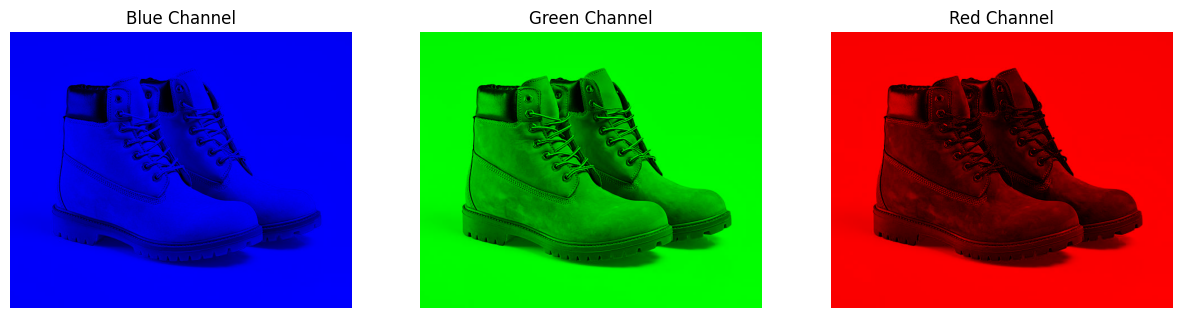

In [ ]:
#plotting individual channels

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(blue_rgb) #imshow here because we're plotting images into the subplots
axs[0].set_title('Blue Channel')
axs[0].axis('off')

axs[1].imshow(green_rgb)
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(red_rgb)
axs[2].set_title('Red Channel')
axs[2].axis('off')

In [ ]:
#image stats: mean

r_mean=np.mean(r)
g_mean=np.mean(g)
b_mean=np.mean(b)

print(f"red channel mean: {r_mean.round(3)} \ngreen channel mean: {g_mean.round(3)} \nblue channel mean: {b_mean.round(3)}")

red channel mean: 183.893 
green channel mean: 202.67 
blue channel mean: 223.093


In [ ]:
#image stats: standard deviation

r_dev=np.std(r)
g_dev=np.std(g)
b_dev=np.std(b)

print(f"red channel std dev: {r_dev.round(3)} \ngreen channel std dev: {g_dev.round(3)} \nblue channel std dev: {b_dev.round(3)}")


red channel std dev: 89.409 
green channel std dev: 68.573 
blue channel std dev: 49.541


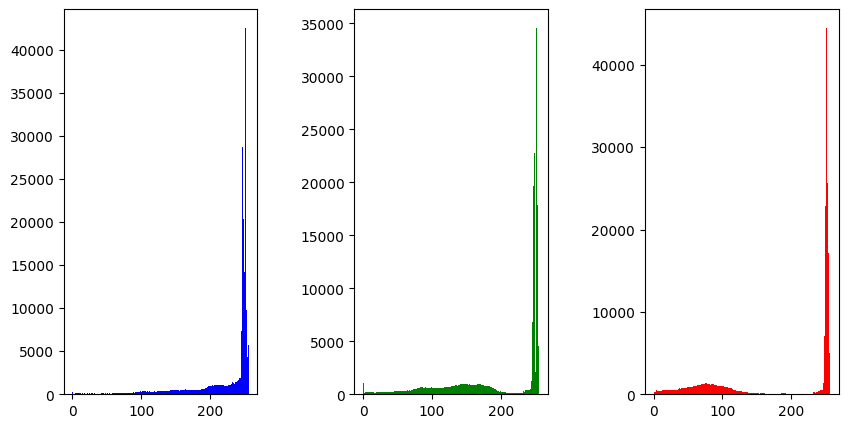

In [ ]:
#image statistics: histogram

fig, (a1,a2,a3) = plt.subplots(1, 3, figsize=(10,5)) #creating and naming the subplots

#plotting histogram within first subplot (a1.hist)
a1.hist(b.ravel(), bins=256, range=(0, 256), color='blue') #bin_val and range=256 bc greyscale (i.e. single channel)
a2.hist(g.ravel(), bins=256, range=[0,256], color='green')
a3.hist(r.ravel(), bins=256, range=[0,256], color='red')
plt.subplots_adjust(wspace=0.5)

(-0.5, 611.5, 493.5, -0.5)

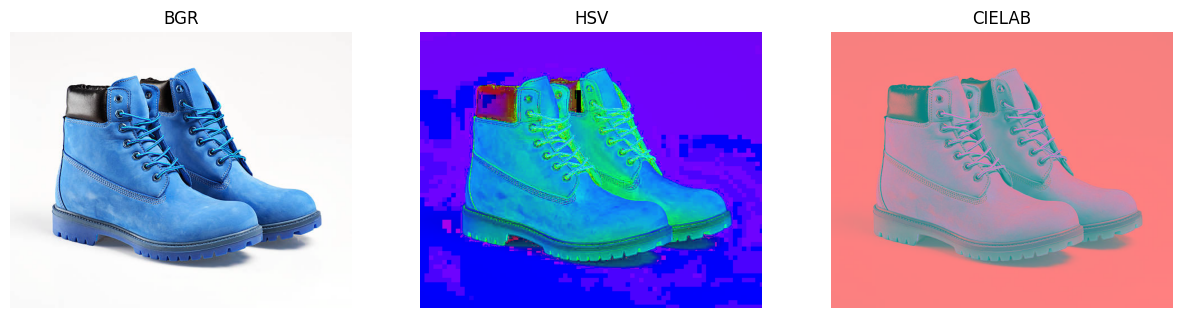

In [ ]:
#converting image to other colorspaces

img_bgr=cv.cvtColor(img, cv.COLOR_RGB2BGR)
img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)
img_lab=cv.cvtColor(img, cv.COLOR_RGB2LAB)

#plotting the converted images

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_bgr)
axs[0].set_title('BGR')
axs[0].axis('off')

axs[1].imshow(img_hsv)
axs[1].set_title('HSV')
axs[1].axis('off')

axs[2].imshow(img_lab)
axs[2].set_title('CIELAB')
axs[2].axis('off')

**Conclusion:**

---



- The mean and standard deviation offer valuable insights into the general luminosity and contrast characteristics of each color channel within the image.

- Transforming the image into HSV and Lab color spaces unveils distinct facets of its color attributes, enhancing utility for tasks such as segmentation and color correction.

# TASK-2: Simple image segmentation using thresholding

**Objective:**


---


Segment an image into foreground and background using global thresholding.

**Steps:**


---


. Read the Image: Load a grayscale image.

. Apply Thresholding: Use a fixed threshold value to segment the image.

. Display Results: Show the original and segmented images.

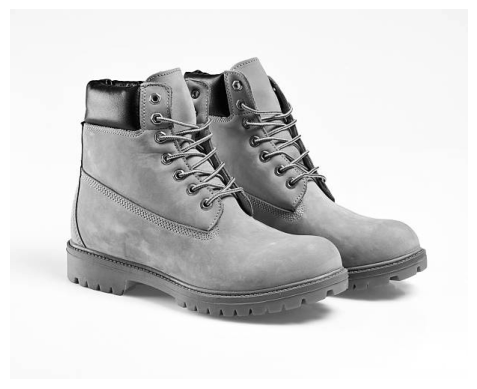

In [ ]:
#convert image to grayscale

img_gray=cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray') #need to specify the cmap as gray explicitly
plt.axis('off')
plt.show()

(-0.5, 611.5, 493.5, -0.5)

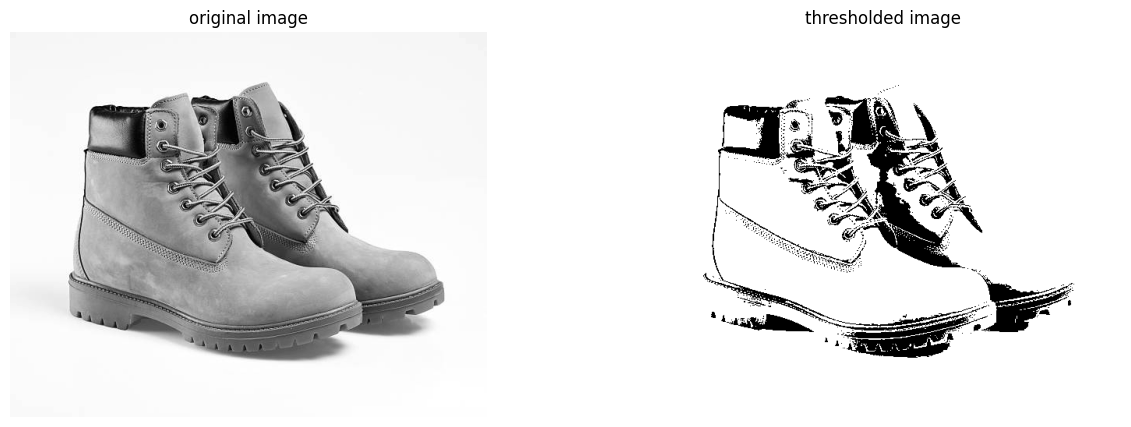

In [ ]:
#using threshold to segment the image

ret, thresh = cv.threshold(img_gray, 105, 255, cv.THRESH_BINARY)
#src is img_gray, threshold val is 200, maxval is 255, type of threshing is binary threshing. This means, pixels above 200 will be set to maxval, and pixels below 200 will be set to 0 (for binary thresholding)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('thresholded image')
axs[1].axis('off')

**Conclusion:**

---



- Global thresholding efficiently delineates the image into foreground and background, though its efficacy is significantly influenced by the selected threshold value.

- This technique encounters difficulties with images exhibiting diverse lighting conditions or intricate backgrounds, frequently resulting in suboptimal segmentation outcomes.

# TASK-3: Color-Based Segmentation

**Objective:**

---



Segment specific objects in an image based on their color.

**Steps:**


---


. Read the Image: Load an image with objects of different colors.

. Convert to HSV: Convert the image to HSV color space.

. Apply Color Thresholding: Use color thresholds to segment objects of a specific color.

. Display Results: Show the original and segmented images.

(-0.5, 611.5, 493.5, -0.5)

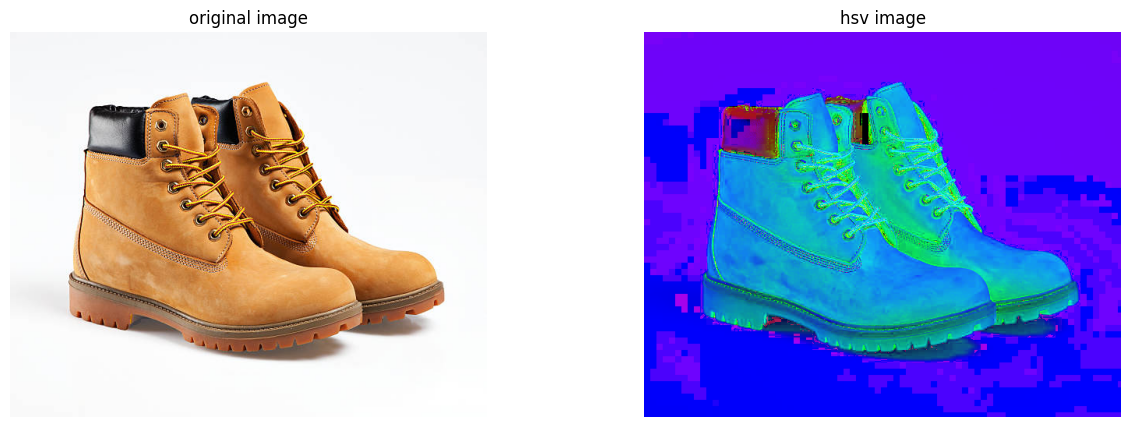

In [ ]:
#convert image to hsv to segment colors (easier representation, intuitive ranges)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(img)

axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(img_hsv)
axs[1].set_title('hsv image')
axs[1].axis('off')

In [ ]:
#segmenting reds from image (reds have 2 ranges, hence lower_mask and upper_mask, other colors may only have 1 range)

lower1 = np.array([0, 100, 20]) # lower boundary RED color range values; Hue (0 - 10)
upper1 = np.array([10, 255, 255]) #array has [H (0-180),S (0-255),V (0-255)]

lower2 = np.array([160,100,20]) # upper boundary RED color range values; Hue (160 - 180)
upper2 = np.array([179,255,255]) #look up ranges for a color to set as mask

lower_mask = cv.inRange(img_hsv, lower1, upper1) #params: src, lower, upper
upper_mask = cv.inRange(img_hsv, lower2, upper2)

full_mask = lower_mask + upper_mask #a mask will have 0 for areas that dont meet the criteria, and white for areas that do meet the range

result = cv.bitwise_and(img, img, mask=full_mask) #bitwise and will plot keep parts of the original image that match the 255s (whites) and not the parts that match the 0s (blacks)

(-0.5, 611.5, 493.5, -0.5)

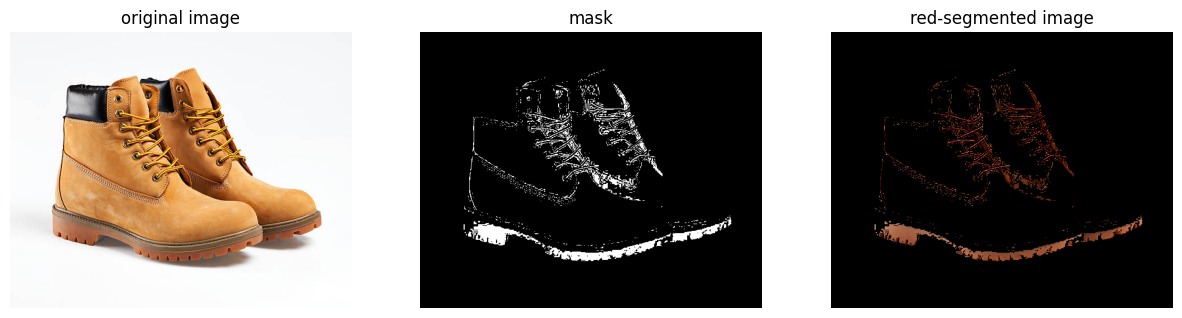

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(full_mask, cmap="gray")
axs[1].set_title('mask')
axs[1].axis('off')

axs[2].imshow(result)
axs[2].set_title('red-segmented image')
axs[2].axis('off')

In [ ]:
#segmenting purples (here only 1 range)

lower = np.array([125, 50, 50])
higher = np.array([155, 255, 255])
mask = cv.inRange(img_hsv, lower, higher)
res = cv.bitwise_and(img, img, mask=mask)

(-0.5, 611.5, 493.5, -0.5)

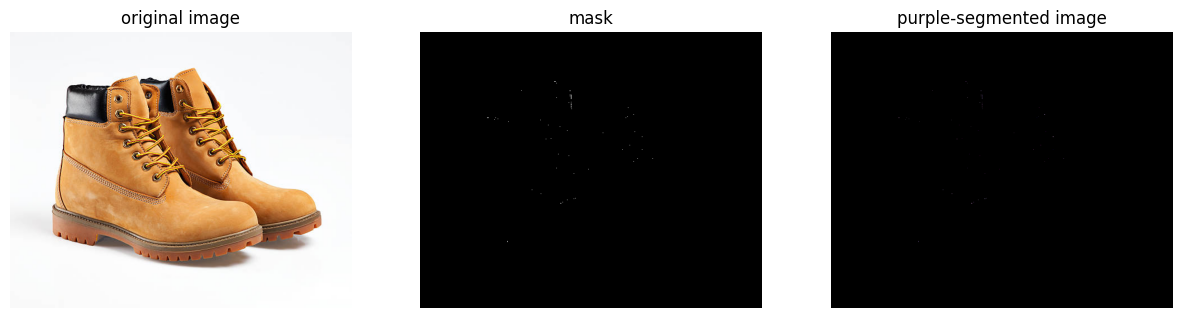

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(mask, cmap="gray")
axs[1].set_title('mask')
axs[1].axis('off')

axs[2].imshow(res)
axs[2].set_title('purple-segmented image')
axs[2].axis('off')

**Conclusion:**

---


- Color-based segmentation in the HSV color space excels at isolating objects with distinct hues, even within complex scenes.

- The effectiveness of this method is highly dependent on the precision of color threshold selection, necessitating meticulous adjustment to prevent the inclusion of extraneous areas or the omission of target object regions.